
# Chapter 5: Image Enhancements using Derivatives

## Excercise 10: Implement the non-max suppression algorithm to thin the edges in a gradient magnitude image.

### Thuật toán **Non-Maximum Suppression** chủ yếu được sử dụng trong xử lý ảnh, đặc biệt là trong các bước phát hiện cạnh (edge detection) hoặc phát hiện đối tượng (object detection). Mục đích chính của thuật toán là **làm mỏng** các cạnh và **loại bỏ** các điểm không phải là cực đại cục bộ trong một hướng cụ thể


### Cách thức hoạt động của NMS:

1. **Tính toán gradient của ảnh**: Trước tiên, cần phải tính toán đạo hàm của ảnh để xác định độ lớn (magnitude) và hướng (direction) của gradient tại mỗi pixel.
2. **Duyệt qua từng pixel**: Duyệt qua từng pixel trong ảnh và so sánh độ lớn gradient của pixel đó với các pixel lân cận trong hướng gradient.
3. **So sánh với các pixel lân cận**: Nếu độ lớn gradient tại pixel hiện tại lớn hơn hoặc bằng độ lớn gradient của các pixel lân cận trong cùng hướng gradient, pixel đó được giữ lại. Nếu không, pixel đó bị loại bỏ (gán giá trị 0).



In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



def non_max_suppression(gradient_magnitude, gradient_direction):
    M, N = gradient_magnitude.shape
    output = np.zeros((M, N), dtype=np.float32)
    
    angle = gradient_direction * 180.0 / np.pi
    angle[angle < 0] += 180

    for i in range(1, M-1):
        for j in range(1, N-1):
            q = 255
            r = 255

            angle_value = angle[i, j]

            if (0 <= angle_value < 22.5) or (157.5 <= angle_value <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif (22.5 <= angle_value < 67.5):
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif (67.5 <= angle_value < 112.5):
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif (112.5 <= angle_value < 157.5):
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            if gradient_magnitude[i, j] >= q and gradient_magnitude[i, j] >= r:
                output[i, j] = gradient_magnitude[i, j]
            else:
                output[i, j] = 0

    return output



*   **M, N**: Lấy kích thước của ma trận gradient\_magnitude (magnitude của gradient, nghĩa là độ mạnh của biên).
    
*   **output**: Khởi tạo một ma trận có cùng kích thước với gradient\_magnitude để lưu trữ kết quả sau khi áp dụng thuật toán NMS. Mặc định, tất cả các giá trị trong output đều là 0.
    
*   **angle**: Chuyển đổi giá trị gradient\_direction từ radian sang độ (°) để dễ dàng xử lý hướng gradient.

*   Duyệt qua tất cả các pixel trong ảnh, bắt đầu từ chỉ số (1, 1) và kết thúc ở (M-1, N-1) để tránh các pixel biên.
    
*   **q** và **r**: Là các giá trị tạm thời dùng để lưu trữ độ mạnh của gradient tại các pixel lân cận của pixel hiện tại, sử dụng để so sánh với giá trị gradient tại pixel hiện tại.
    
*   **angle\_value**: Lấy giá trị hướng của gradient tại pixel (i, j).


*   Dựa trên giá trị hướng angle\_value, ta xác định hướng của gradient và so sánh độ mạnh của gradient tại điểm (i, j) với độ mạnh của các điểm lân cận trong ảnh. Các góc hướng gradient được chia thành 4 nhóm:
    
*   **0 <= angle\_value < 22.5**
    
    
*   **157.5 <= angle\_value <= 180**: So sánh với các điểm bên trái và bên phải.
    
*   **22.5 <= angle\_value < 67.5**: So sánh với các điểm chéo trên và dưới.
    
*   **67.5 <= angle\_value < 112.5**: So sánh với các điểm trên và dưới.
    
*   **112.5 <= angle\_value < 157.5**: So sánh với các điểm chéo dưới và trên.

Sau khi so sánh với các điểm lân cận, nếu độ mạnh của gradient tại pixel (i, j) lớn hơn hoặc bằng độ mạnh của các điểm lân cận (q và r), ta giữ lại giá trị này trong ma trận output. Nếu không, ta gán giá trị đó là 0, nghĩa là loại bỏ điểm đó khỏi biên.

In [ ]:
image = cv2.imread('D:\\Image_Processcing_Project\\images\\horse.jpg', 0)
blurred_image = cv2.GaussianBlur(image, (5, 5), 1.4)
gradient_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
gradient_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)
gradient_magnitude = cv2.magnitude(gradient_x, gradient_y)
gradient_direction = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)

thinned_image = non_max_suppression(gradient_magnitude, gradient_direction)



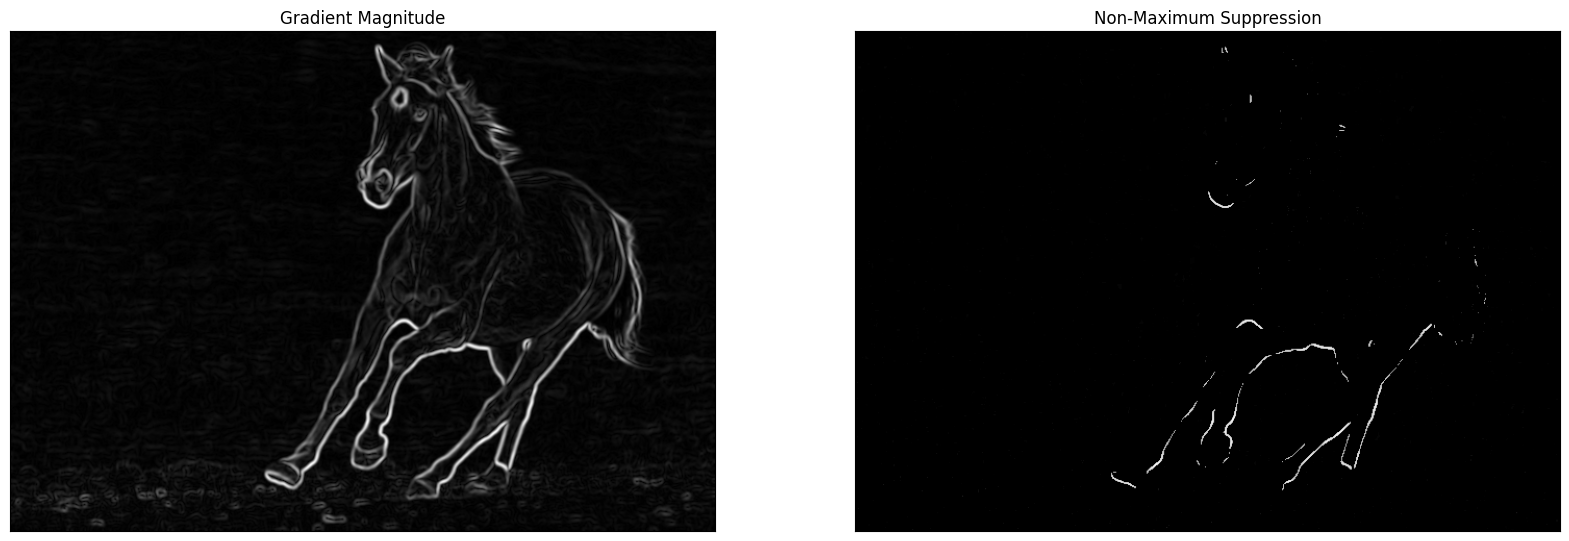

In [14]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1), plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Gradient Magnitude'), plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2), plt.imshow(thinned_image, cmap='gray')
plt.title('Non-Maximum Suppression'), plt.xticks([]), plt.yticks([])

plt.show()